In [2]:
import keras
import tensorflow_datasets as tfds
import numpy as np

ds_train, ds_test = tfds.load('svhn_cropped', split=['train[:15%]', 'test[:15%]'], as_supervised=True)

# Convert tf.data.Dataset to NumPy arrays
def tfds_to_numpy(dataset):
    images = []
    labels = []
    for image, label in tfds.as_numpy(dataset):
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

x_train, y_train = tfds_to_numpy(ds_train)
x_test, y_test = tfds_to_numpy(ds_test)

print("The SVHN Street View House Numbers database has a training set of %d examples." % len(x_train))
print("The SVHN Street View House Numbers database has a test set of %d examples." % len(x_test))

The SVHN Street View House Numbers database has a training set of 10989 examples.
The SVHN Street View House Numbers database has a test set of 3905 examples.


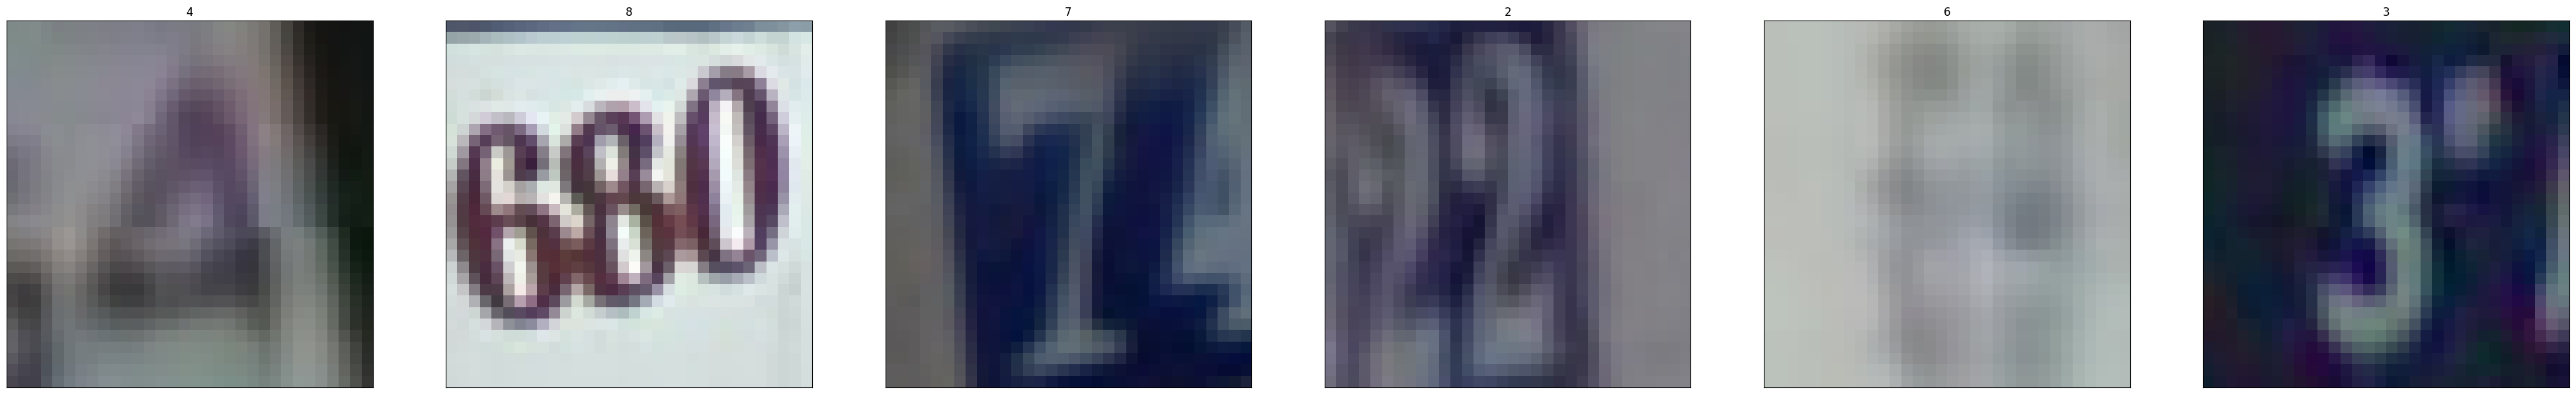

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(50,50))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i])
    ax.set_title(str(y_train[i]))

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

print('X_train shape:', x_train.shape)

X_train shape: (10989, 32, 32, 3)


In [5]:
from tensorflow.keras.utils import to_categorical

num_classes = 10 
print('Integer-valued labels:')
print(y_train[:10])

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[4 8 7 2 6 3 0 8 5 4]
One-hot labels:
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [6]:
img_rows, img_cols, channel = 32, 32, 3

input_shape = (img_rows, img_cols, channel)

print('input_shape: ', input_shape)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

input_shape:  (32, 32, 3)
x_train shape: (10989, 32, 32, 3)
x_test shape: (3905, 32, 32, 3)


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same',
activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same',
activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same',
activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))
model.summary()

C:\Users\PaulE\DeepLearning\local\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,054 (2.01 MB)

 Trainable params: 528,054 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [9]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.color.conv.dropout.keras', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/15

Epoch 1: val_loss improved from inf to 1.95372, saving model to model.weights.color.conv.dropout.keras
344/344 - 4s - 11ms/step - accuracy: 0.2117 - loss: 2.1974 - val_accuracy: 0.3068 - val_loss: 1.9537
Epoch 2/15

Epoch 2: val_loss improved from 1.95372 to 1.21693, saving model to model.weights.color.conv.dropout.keras
344/344 - 2s - 7ms/step - accuracy: 0.4558 - loss: 1.6247 - val_accuracy: 0.6166 - val_loss: 1.2169
Epoch 3/15

Epoch 3: val_loss improved from 1.21693 to 0.96945, saving model to model.weights.color.conv.dropout.keras
344/344 - 3s - 7ms/step - accuracy: 0.6111 - loss: 1.2054 - val_accuracy: 0.6948 - val_loss: 0.9695
Epoch 4/15

Epoch 4: val_loss improved from 0.96945 to 0.83254, saving model to model.weights.color.conv.dropout.keras
344/344 - 2s - 7ms/step - accuracy: 0.6819 - loss: 0.9981 - val_accuracy: 0.7444 - val_loss: 0.8325
Epoch 5/15

Epoch 5: val_loss improved from 0.83254 to 0.74978, saving model to model.weights.color.conv.dropout.keras
344/344 

In [10]:
model.load_weights('model.weights.color.conv.dropout.keras')

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 83.1754%


In [12]:
print(hist.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


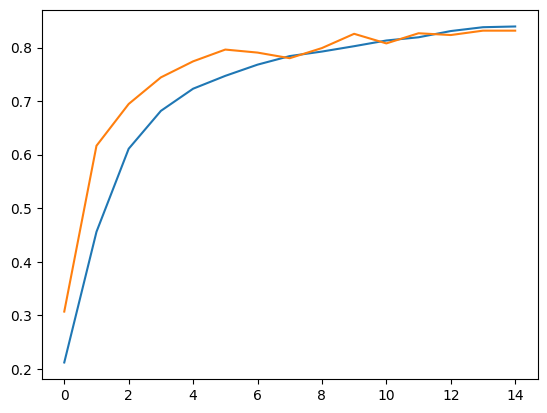

In [13]:
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.show()

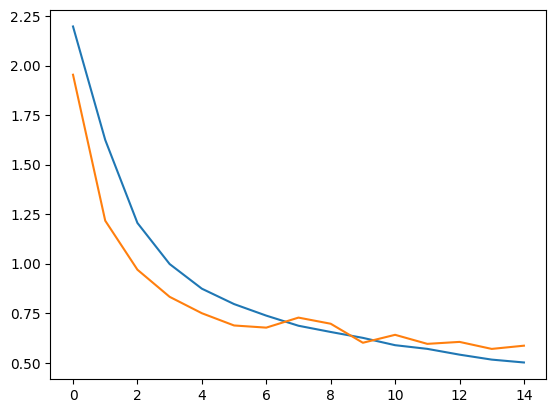

In [14]:
plt.plot(hist.history['loss'], label='Train losss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.show()

Normalisation

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same',
activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same',
activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same',
activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

In [16]:
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer2 = ModelCheckpoint(filepath='model.weights.color.normalised.conv.dropout.keras', verbose=1, 
                               save_best_only=True)
hist2 = model.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_test, y_test), callbacks=[checkpointer2], 
          verbose=2, shuffle=True)

Epoch 1/15

Epoch 1: val_loss improved from inf to 1.29066, saving model to model.weights.color.normalised.conv.dropout.keras
344/344 - 4s - 12ms/step - accuracy: 0.3501 - loss: 1.8689 - val_accuracy: 0.5560 - val_loss: 1.2907
Epoch 2/15

Epoch 2: val_loss improved from 1.29066 to 0.93314, saving model to model.weights.color.normalised.conv.dropout.keras
344/344 - 3s - 8ms/step - accuracy: 0.6246 - loss: 1.1713 - val_accuracy: 0.7147 - val_loss: 0.9331
Epoch 3/15

Epoch 3: val_loss improved from 0.93314 to 0.75589, saving model to model.weights.color.normalised.conv.dropout.keras
344/344 - 3s - 8ms/step - accuracy: 0.7153 - loss: 0.9104 - val_accuracy: 0.7749 - val_loss: 0.7559
Epoch 4/15

Epoch 4: val_loss improved from 0.75589 to 0.71867, saving model to model.weights.color.normalised.conv.dropout.keras
344/344 - 3s - 8ms/step - accuracy: 0.7563 - loss: 0.7669 - val_accuracy: 0.7910 - val_loss: 0.7187
Epoch 5/15

Epoch 5: val_loss did not improve from 0.71867
344/344 - 3s - 8ms/step 

In [18]:
model.load_weights('model.weights.color.normalised.conv.dropout.keras')
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 85.2753%


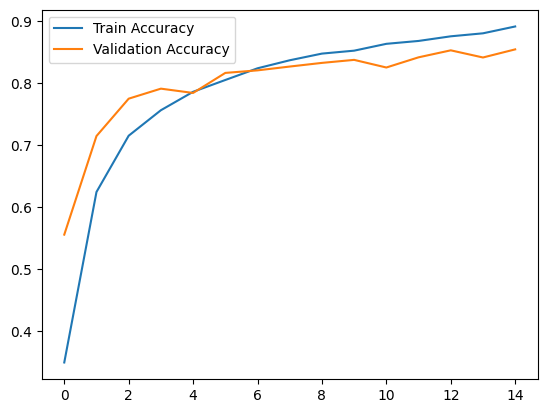

In [19]:
plt.plot(hist2.history['accuracy'], label='Train Accuracy')
plt.plot(hist2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

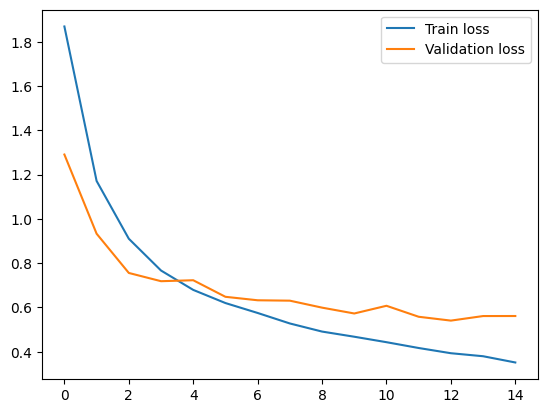

In [20]:
plt.plot(hist2.history['loss'], label='Train loss')
plt.plot(hist2.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [21]:
from keras import regularizers
weight_decay = 1e-4 
model3 = Sequential()
model3.add(Conv2D(filters=16, kernel_size=2, padding='same', kernel_regularizer=regularizers.l2(weight_decay),
activation='relu', input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Conv2D(filters=32, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay),
activation='relu'))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Conv2D(filters=64, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay),
activation='relu'))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(500, activation='relu'))
model3.add(Dropout(0.4))

model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 16)          │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,054 (2.01 MB)

 Trainable params: 528,054 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
checkpointer3 = ModelCheckpoint(filepath='model.weights.color.conv.dropout.l2.keras', verbose=1, 
                               save_best_only=True)
hist3 = model3.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_test, y_test), callbacks=[checkpointer3], 
          verbose=2, shuffle=True)

Epoch 1/15

Epoch 1: val_loss improved from inf to 1.26070, saving model to model.weights.color.conv.dropout.l2.keras
344/344 - 4s - 12ms/step - accuracy: 0.3602 - loss: 1.8573 - val_accuracy: 0.5823 - val_loss: 1.2607
Epoch 2/15

Epoch 2: val_loss improved from 1.26070 to 0.87585, saving model to model.weights.color.conv.dropout.l2.keras
344/344 - 3s - 8ms/step - accuracy: 0.6395 - loss: 1.1229 - val_accuracy: 0.7414 - val_loss: 0.8758
Epoch 3/15

Epoch 3: val_loss improved from 0.87585 to 0.74743, saving model to model.weights.color.conv.dropout.l2.keras
344/344 - 3s - 8ms/step - accuracy: 0.7296 - loss: 0.8690 - val_accuracy: 0.7841 - val_loss: 0.7474
Epoch 4/15

Epoch 4: val_loss improved from 0.74743 to 0.67116, saving model to model.weights.color.conv.dropout.l2.keras
344/344 - 3s - 8ms/step - accuracy: 0.7653 - loss: 0.7579 - val_accuracy: 0.8054 - val_loss: 0.6712
Epoch 5/15

Epoch 5: val_loss improved from 0.67116 to 0.64271, saving model to model.weights.color.conv.dropout.l2

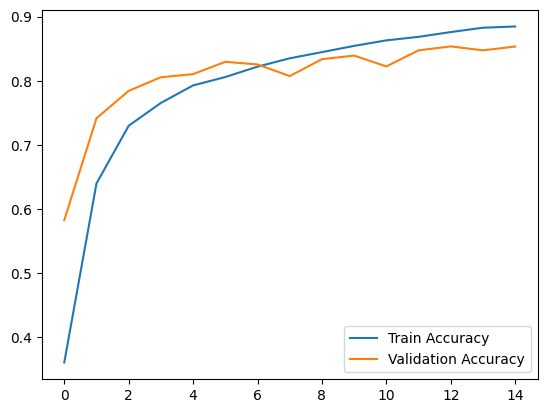

In [23]:
plt.plot(hist3.history['accuracy'], label='Train Accuracy')
plt.plot(hist3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

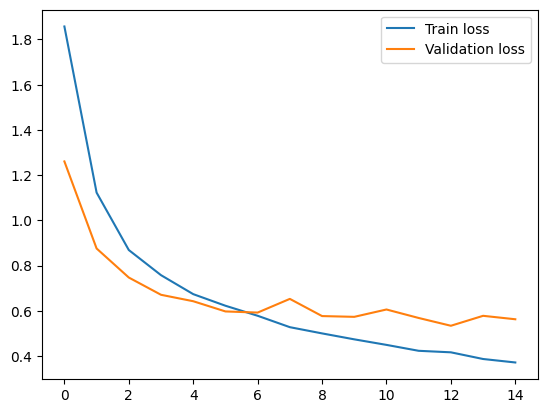

In [24]:
plt.plot(hist3.history['loss'], label='Train loss')
plt.plot(hist3.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [25]:
model3.load_weights('model.weights.color.conv.dropout.l2.keras')
score = model3.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 85.3521%


Batch Normalisation

In [26]:
from keras import regularizers 
from keras.layers import BatchNormalization, Activation

model4 = Sequential()
model4.add(Conv2D(filters=16, kernel_size=2, padding='same', kernel_regularizer=regularizers.l2(weight_decay),
input_shape=input_shape))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=2))

model4.add(Conv2D(filters=32, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay)))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=2))

model4.add(Conv2D(filters=64, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay)))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=2))

model4.add(Flatten())

model4.add(Dense(500))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.4))

model4.add(Dense(10, activation='softmax'))

model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 16)          │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 500)                 │           2,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 530,502 (2.02 MB)

 Trainable params: 529,278 (2.02 MB)

 Non-trainable params: 1,224 (4.78 KB)

In [31]:
model4.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
checkpointer4 = ModelCheckpoint(filepath='model.weights.color.conv.dropout.l2.batch.keras', verbose=1, 
                               save_best_only=True)
hist4 = model4.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_test, y_test), callbacks=[checkpointer4], 
          verbose=2, shuffle=True)

Epoch 1/15

Epoch 1: val_loss improved from inf to 0.79574, saving model to model.weights.color.conv.dropout.l2.batch.keras
344/344 - 9s - 27ms/step - accuracy: 0.9181 - loss: 0.2622 - val_accuracy: 0.7915 - val_loss: 0.7957
Epoch 2/15

Epoch 2: val_loss improved from 0.79574 to 0.77847, saving model to model.weights.color.conv.dropout.l2.batch.keras
344/344 - 6s - 16ms/step - accuracy: 0.9276 - loss: 0.2329 - val_accuracy: 0.8049 - val_loss: 0.7785
Epoch 3/15

Epoch 3: val_loss did not improve from 0.77847
344/344 - 4s - 13ms/step - accuracy: 0.9301 - loss: 0.2150 - val_accuracy: 0.7703 - val_loss: 1.0446
Epoch 4/15

Epoch 4: val_loss did not improve from 0.77847
344/344 - 4s - 13ms/step - accuracy: 0.9371 - loss: 0.1943 - val_accuracy: 0.8077 - val_loss: 0.8550
Epoch 5/15

Epoch 5: val_loss did not improve from 0.77847
344/344 - 5s - 14ms/step - accuracy: 0.9493 - loss: 0.1661 - val_accuracy: 0.7931 - val_loss: 0.9569
Epoch 6/15

Epoch 6: val_loss improved from 0.77847 to 0.77252, sa

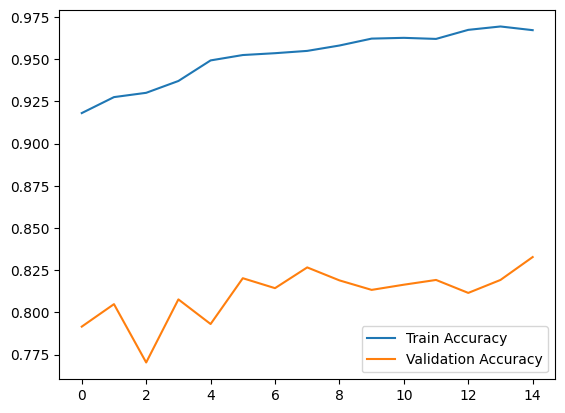

In [32]:
plt.plot(hist4.history['accuracy'], label='Train Accuracy')
plt.plot(hist4.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

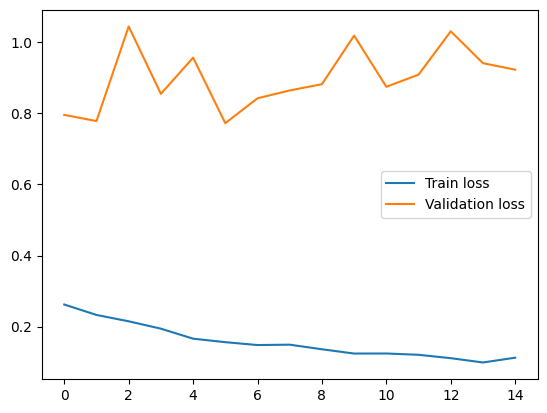

In [33]:
plt.plot(hist4.history['loss'], label='Train loss')
plt.plot(hist4.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [34]:
model4.load_weights('model.weights.color.conv.dropout.l2.batch.keras')
score = model4.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 82.0230%


DATA Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range=5,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=False,
vertical_flip=False
)
datagen.fit(x_train)
model5 = Sequential()
model5.add(Conv2D(filters=16, kernel_size=2, padding='same', kernel_regularizer=regularizers.l2(weight_decay),
input_shape=input_shape))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=2))

model5.add(Conv2D(filters=32, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=2))

model5.add(Conv2D(filters=64, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=2))

model5.add(Flatten())

model5.add(Dense(500))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.4))

model5.add(Dense(10, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
checkpointer5 = ModelCheckpoint(filepath='model.weights.color.conv.dropout.l2.batch.augm.keras', verbose=1, 
                               save_best_only=True)
hist5 = model5.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_test, y_test), callbacks=[checkpointer5], 
          verbose=2, shuffle=True)
model5.load_weights('model.weights.color.conv.dropout.l2.batch.augm.keras')
score = model5.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)


Epoch 1/15

Epoch 1: val_loss improved from inf to 1.16493, saving model to model.weights.color.conv.dropout.l2.batch.augm.keras
344/344 - 7s - 20ms/step - accuracy: 0.4919 - loss: 1.5877 - val_accuracy: 0.6159 - val_loss: 1.1649
Epoch 2/15

Epoch 2: val_loss improved from 1.16493 to 0.81461, saving model to model.weights.color.conv.dropout.l2.batch.augm.keras
344/344 - 5s - 14ms/step - accuracy: 0.7445 - loss: 0.8066 - val_accuracy: 0.7408 - val_loss: 0.8146
Epoch 3/15

Epoch 3: val_loss improved from 0.81461 to 0.74451, saving model to model.weights.color.conv.dropout.l2.batch.augm.keras
344/344 - 5s - 13ms/step - accuracy: 0.8005 - loss: 0.6314 - val_accuracy: 0.7695 - val_loss: 0.7445
Epoch 4/15

Epoch 4: val_loss improved from 0.74451 to 0.67181, saving model to model.weights.color.conv.dropout.l2.batch.augm.keras
344/344 - 6s - 18ms/step - accuracy: 0.8357 - loss: 0.5201 - val_accuracy: 0.8020 - val_loss: 0.6718
Epoch 5/15

Epoch 5: val_loss did not improve from 0.67181
344/344 -

In [ ]:
plt.plot(hist5.history['accuracy'], label='Train Accuracy')
plt.plot(hist5.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(hist5.history['loss'], label='Train loss')
plt.plot(hist5.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()